In [5]:
print("helloworld.2.")

helloworld.2.


In [6]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [7]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import tensorflow as tf
import matplotlib.pyplot as plt


In [9]:
import os
print("current Dir ",os.getcwd())
curr_dir = os.getcwd()
train_path = os.path.join(curr_dir,"datasets","Train")
test_path = os.path.join(curr_dir,"datasets","Test")
valid_path = os.path.join(curr_dir,"datasets","valid")


current Dir  c:\Users\dell\Desktop\potato


In [10]:
training_set = tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",  # Fixed typo here
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear"
)


Found 900 files belonging to 3 classes.


In [11]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [12]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",  # Fixed typo here
    color_mode="rgb",
    image_size=(128, 128),
    shuffle=True,
    interpolation="bilinear"
)


Found 300 files belonging to 3 classes.


In [13]:
cnn = tf.keras.models.Sequential()  # Capital 'S' in Sequential

cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3, activation='softmax'))


C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         4,503 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,790,227 (29.72 MB)

 Trainable params: 7,790,227 (29.72 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
training_history = cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 45s 1s/step - accuracy: 0.3397 - loss: 1.5323 - val_accuracy: 0.4000 - val_loss: 1.0192
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.5431 - loss: 0.9016 - val_accuracy: 0.6433 - val_loss: 0.8701
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.7517 - loss: 0.5444 - val_accuracy: 0.8000 - val_loss: 0.4732
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.8123 - loss: 0.4462 - val_accuracy: 0.8100 - val_loss: 0.4206
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.8407 - loss: 0.3554 - val_accuracy: 0.8933 - val_loss: 0.2407
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 35s 1s/step - accuracy: 0.9191 - loss: 0.2098 - val_accuracy: 0.9000 - val_loss: 0.2533
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 36s 1s/step - accuracy: 0.9173 - loss: 0.1938 - val_accuracy: 0.8833 - val_loss: 0.4508
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.8826 - loss: 0.4515 - val_accuracy: 0.9433 - val_loss:

In [19]:
train_loss, train_acc = cnn.evaluate(training_set)
print('Training accuracy:', train_acc)


29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 311ms/step - accuracy: 0.9889 - loss: 0.0350
Training accuracy: 0.9888888597488403


In [20]:
val_loss, val_acc = cnn.evaluate(validation_set)
print('validation accuracy:', val_acc)


10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 316ms/step - accuracy: 0.9707 - loss: 0.0904
validation accuracy: 0.9633333086967468


In [21]:
cnn.save('trained_plant_disease_model.keras')

In [22]:
training_history.history

{'accuracy': [0.35777777433395386,
  0.6366666555404663,
  0.754444420337677,
  0.8211110830307007,
  0.8666666746139526,
  0.9122222065925598,
  0.9311110973358154,
  0.9222221970558167,
  0.9611111283302307,
  0.9755555391311646],
 'loss': [1.2689021825790405,
  0.7684357166290283,
  0.5589258670806885,
  0.4156947731971741,
  0.3209534287452698,
  0.23883503675460815,
  0.1699702888727188,
  0.2874264419078827,
  0.10467978566884995,
  0.06553873419761658],
 'val_accuracy': [0.4000000059604645,
  0.6433333158493042,
  0.800000011920929,
  0.8100000023841858,
  0.8933333158493042,
  0.8999999761581421,
  0.8833333253860474,
  0.9433333277702332,
  0.9466666579246521,
  0.9633333086967468],
 'val_loss': [1.0191707611083984,
  0.8700899481773376,
  0.47319158911705017,
  0.4206302762031555,
  0.2406907081604004,
  0.25325891375541687,
  0.4508247971534729,
  0.16359567642211914,
  0.12297084927558899,
  0.10648702830076218]}

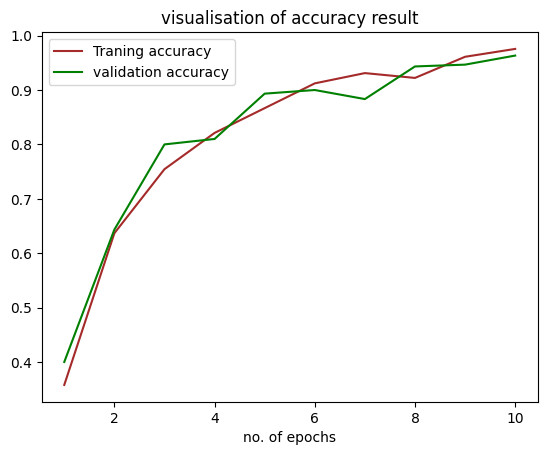

In [23]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Traning accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='validation accuracy')
plt.xlabel('no. of epochs')
plt.title('visualisation of accuracy result')
plt.legend()
plt.show()